# Visual Area Segmentation

##### copied/adapted from:

https://github.com/zhuangjun1981/NeuroAnalysisTools/blob/master/NeuroAnalysisTools/RetinotopicMapping.py

##### Cite the original work/implementation:

[Zhuang et al., Elife (2017)](https://elifesciences.org/articles/18372)

In [100]:
# load packages:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
from PIL import Image
import os
import glob
import pickle

In [101]:
def saveFile(path, data):
    with open(path, 'wb') as f:
        pickle.dump(data, f)

## Load data


  loading previously calculated maps --> can be overwritten un the UI ! 
 


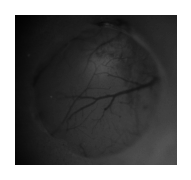

In [555]:
dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_07_04/14-41-21'
dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_06/14-38-46'
dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_06/16-00-17'
dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_20/16-03-50'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_20/17-12-12'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_03_12/16-18-33'

# retinotopic mapping data
#maps = np.load(os.path.join(dataFolder, 'raw-maps.npy') , allow_pickle=True).item()
maps = load_maps(dataFolder)

# vasculature picture
imVasc = np.array(Image.open(glob.glob(os.path.join(dataFolder, 'vasculature*.tif'))[0]))
plt.imshow(imVasc**1, cmap=plt.cm.grey); plt.axis('off');

# Retinotopic Maps

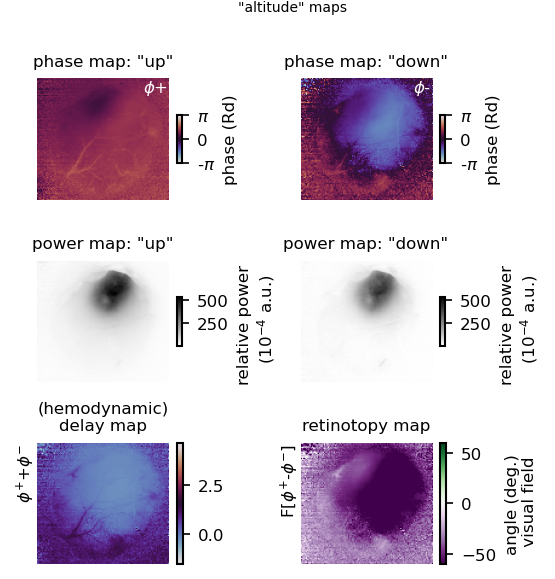

In [556]:
plot_retinotopic_maps(maps, map_type='altitude');

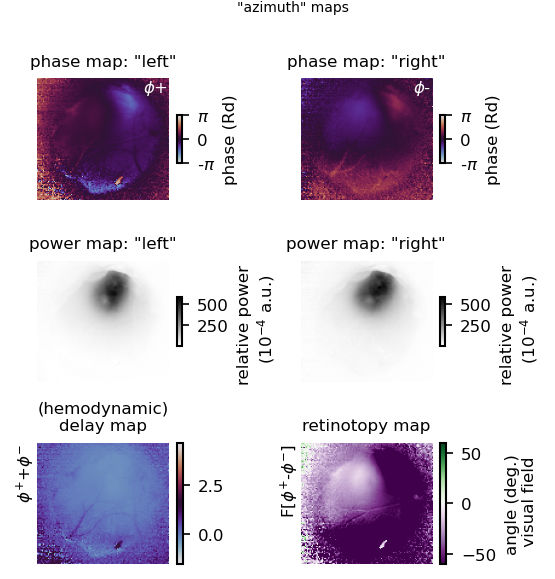

In [557]:
plot_retinotopic_maps(maps, map_type='azimuth');

# Perform Segmentation

0.4473170169704833


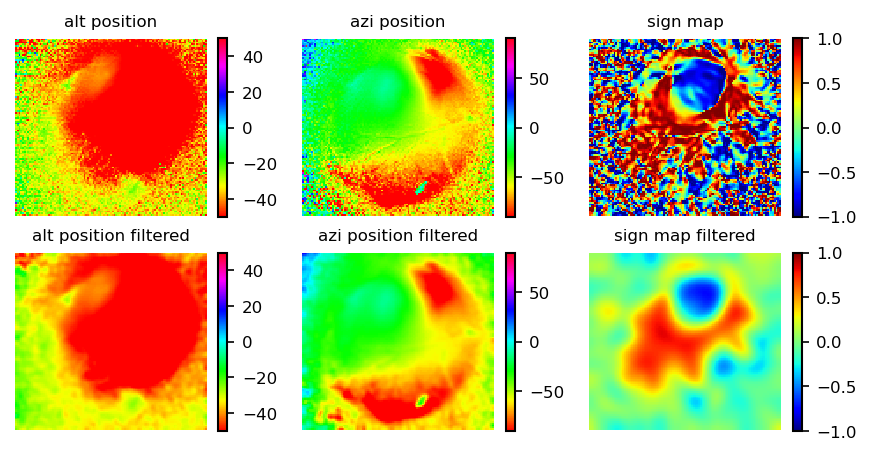

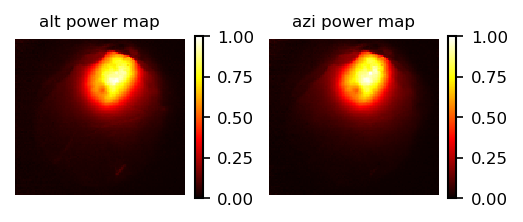

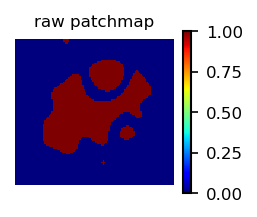

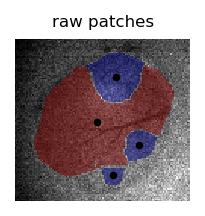

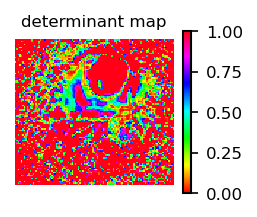

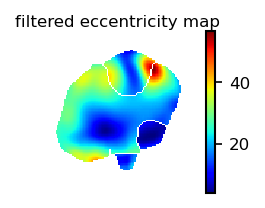

patch01AU=940.25 AS=3873.3447572418136 ratio=4.119483921554707
3 local minuma were found!!!
patch02AU=26.5 AS=1985.709045105178 ratio=74.9324167964218
Only one local minumum was found!!!
patch03AU=0.0 AS=239.7903139782976 ratio=inf
Only one local minumum was found!!!
patch04AU=96.25 AS=505.54709585559596 ratio=5.252437359538659
Only one local minumum was found!!!


c:\Users\logusr-dws0027\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\logusr-dws0027\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\logusr-dws0027\Documents\physion\notebooks\../src\physion\intrinsic\RetinotopicMapping.py:1273: RuntimeWarning: divide by zero encountered in scalar divide
  print(key + 'AU=' + str(AU) + ' AS=' + str(AS) + ' ratio=' + str(AS / AU))
c:\Users\logusr-dws0027\Documents\physion\notebooks\../src\physion\intrinsic\RetinotopicMapping.py:1275: RuntimeWarning: divide by zero encountered in scalar divide
  if AS / AU >= splitOverlapThr:


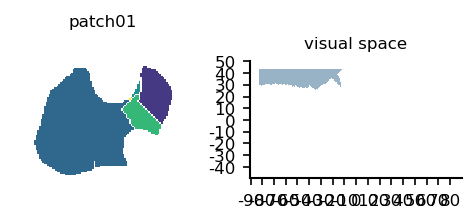

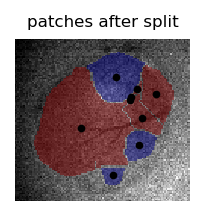

merge iteration: 1


c:\Users\logusr-dws0027\Documents\physion\notebooks\../src\physion\intrinsic\RetinotopicMapping.py:1439: RuntimeWarning: invalid value encountered in scalar divide
  overlapRatio1 = Aoverlap / AU1
c:\Users\logusr-dws0027\Documents\physion\notebooks\../src\physion\intrinsic\RetinotopicMapping.py:1440: RuntimeWarning: invalid value encountered in scalar divide
  overlapRatio2 = Aoverlap / AU2


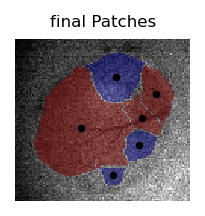

In [595]:
data = build_trial_data(maps)
data['vasculatureMap'] = imVasc[::int(imVasc.shape[0]/data['aziPosMap'].shape[0]),\
                                ::int(imVasc.shape[1]/data['aziPosMap'].shape[1])]
segmentation_params={'phaseMapFilterSigma': 1.2,
                     'signMapFilterSigma': 4.5,
                     'signMapThr': 0.33,
                     'splitLocalMinCutStep': 5,
                     'mergeOverlapThr': 0.1,
                     'splitOverlapThr': 1.1,
                     'closeIter': 3,
                     'openIter': 1,
                     'dilationIter': 15,
                     'borderWidth': 1,
                     'eccMapFilterSigma': 10.,
                     'smallPatchThr': 100,
                     'visualSpacePixelSize': 0.5,
                     'visualSpaceCloseIter': 15}
data['params'] = segmentation_params
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=True) # TURN TO  TO VISUALIZE THE SEGMENTATION STEPS

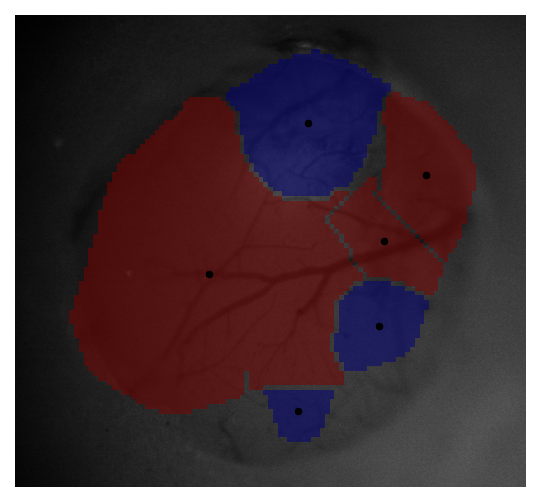

In [596]:
fig, ax = pt.figure(figsize=(5,5))
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.axis('off');
#fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))

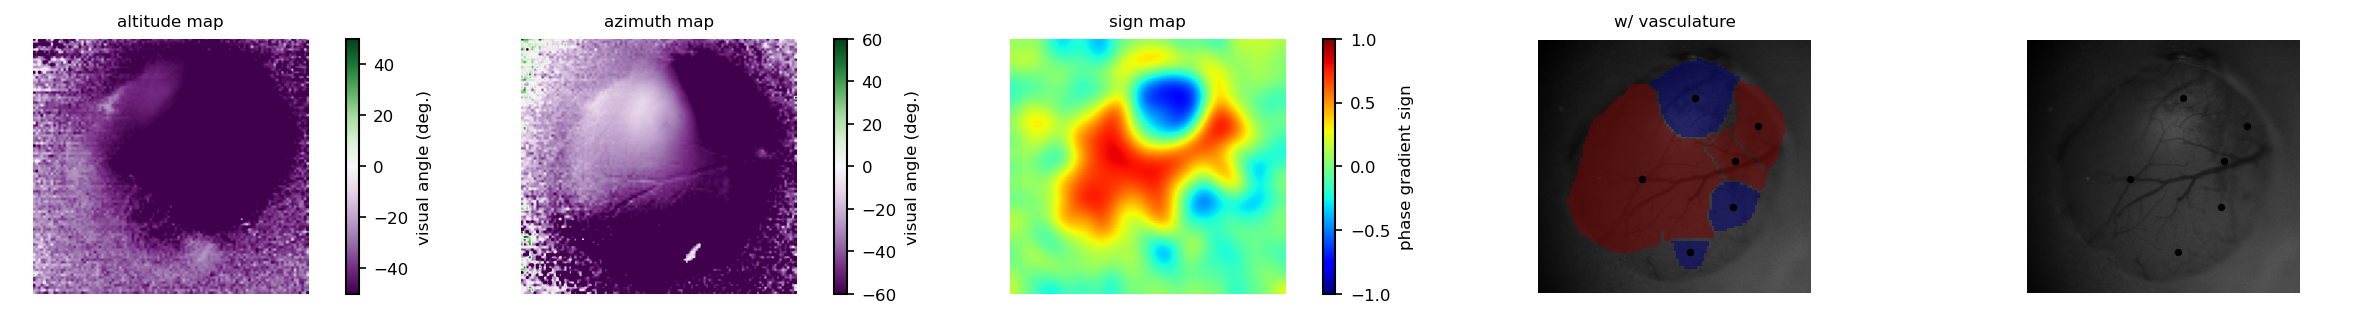

In [597]:
fig, AX = pt.figure(axes=(5,1), figsize=(.9*2,.9*3), wspace=0.4)

for map_type, ax, bounds in zip(['altitude', 'azimuth'], AX[:2],
                                [[-50, 50],[-60, 60]]):
    im = ax.imshow(maps['%s-retinotopy' % map_type], cmap=plt.cm.PRGn,\
                   vmin=bounds[0], vmax=bounds[1])
    fig.colorbar(im, ax=ax,
                 label='visual angle (deg.)')
    ax.set_title('%s map' % map_type)

ax = AX[2]
im = ax.imshow(trial.signMapf, cmap='jet', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax, label='phase gradient sign')
ax.set_title('sign map')
    
ax=AX[-2]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), 
          extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.set_title('w/ vasculature')

ax = AX[-1]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])

for ax in AX:
    ax.axis('equal')
    ax.axis('off')    

#fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))

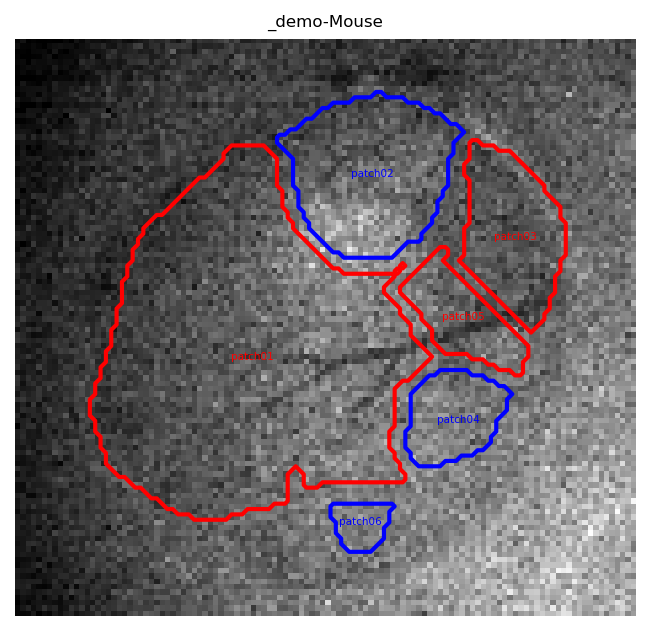

In [598]:
f = plt.figure(figsize=(6,5))
plotAxis = f.add_subplot(111)
_ = trial.plotFinalPatchBorders2(plotAxis=plotAxis, fontSize=5)
plt.show()

In [600]:
names = [
         ['patch01', 'RL'],
         ['patch02', 'V1'],
         ['patch03', 'PM'],
         ['patch04', 'AM'],
         ['patch05', 'MMA'],
         ['patch06', 'RLL']
         ]

finalPatchesMarked = dict(trial.finalPatches)

for i, namePair in enumerate(names):
    currPatch = finalPatchesMarked.pop(namePair[0])
    newPatchDict = {namePair[1]:currPatch}
    finalPatchesMarked.update(newPatchDict)
    
trial.finalPatchesMarked = finalPatchesMarked

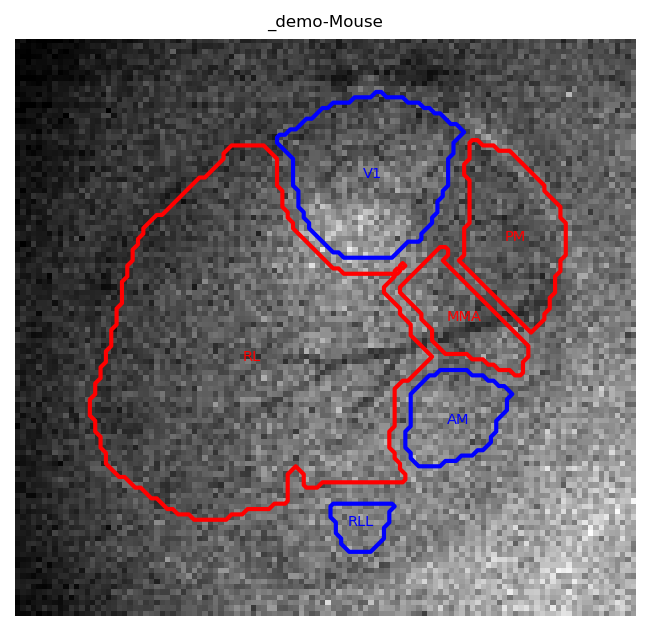

In [601]:
f = plt.figure(figsize=(6,5))
plotAxis = f.add_subplot(111)
_ = trial.plotFinalPatchBorders2(plotAxis=plotAxis, fontSize=7)
plt.show()

In [602]:
trialDict = trial.generateTrialDict()
trialDict.keys()

dict_keys(['mouseID', 'dateRecorded', 'altPosMap', 'aziPosMap', 'altPowerMap', 'aziPowerMap', 'vasculatureMap', 'comments', 'params', 'altPosMapf', 'aziPosMapf', 'altPowerMapf', 'aziPowerMapf', 'signMap', 'signMapf', 'rawPatchMap', 'eccentricityMapf', 'finalPatches', 'finalPatchesMarked'])

In [604]:
#saveFile(dataFolder+"/trialDict.pkl", trialDict)